<a href="https://colab.research.google.com/github/ulissigroup/math-methods-chemical-engineering/blob/master/lecture_notes/16-coupled-odes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
$$\newcommand{\arr}[1]{\underline{\underline{#1}}}$$    
$$\newcommand{\vec}[1]{\underline{#1}}$$   
$$\require{mhchem}$$

# Notes for online / zoom lectures from dry-run

Zoom:
* Please mute your mic's. You can easily unmute by clicking the unmute button, or you can also hold the spacebar to talk
* In the participants list (button at the bottom to show), you can add feedback like "raise your hand" etc
* You can annotate what I'm drawing by going to the top of your screen -> other -> annotate to help with asking questions
* Lectures will be recorded for students in other time zones and posted to the google drive. Because there is student discussion, you may not share the recordings outside of this class in any way (federal regulations).
* You can have your camera on or not. All things considered, I would probably prefer some of you having the cams on to get some sense of whether/how you are following along. It is not very exciting to talk to black rectangles.  
* All class/OH zoom links are in the google calendar: https://calendar.google.com/calendar/b/1?cid=YW5kcmV3LmNtdS5lZHVfM3BwcHFmZjk4dDQ2ZDRjdm4xMjc0dms0a2tAZ3JvdXAuY2FsZW5kYXIuZ29vZ2xlLmNvbQ

Class notes:
* We will have a 5min break as normal
* You are welcome to follow along with the notes in colab, or by directly going to the jamboard link, which allows you to flip between the note pages. 
* If copying/writing notes helps you remember content, you should continue to do that as if you were in class

Logistics:
* HW8 is due tomorrow Fri at noon EST. For this week, if you submit something you get credit for it. HW8 is on the exam.
* There is a bonus OH today that Matt will lead 4-5pm
* Exam 2 is on Tuesday. I will attempt to use the lockdown browser in canvas, but since this is a test I will also email the pdf's. ODE's are less formulaic than the linear algebra we needed, so I expect this exam will be harder for you than the first one. 
* If you are outside of EST and need to take the exam at another time, please email me this week


# Couple Differential Equations
* Everything we've done so far has involved functions that depend only on independent variables:\
e.g.,
\begin{align}
y(x) &&  or && y(x,t)\\
\frac{dy}{dx} \text{ for ODEs } && && 
\frac{\partial y}{\partial x} \& \frac{\partial y}{\partial t} \text{ for PDEs}
\end{align}
* Sometimes, functions can depend on other functions. e.g. given $y_1(x)$ & $y_2(x)$
\begin{align}
\frac{dy_1}{dx} = y_2\\
\frac{dy_2}{dx} = y_1 + \sin x
\end{align}
are coupled ODEs. Sometimes, we can solve by substitution (e.g. take derivative of equation 1 above and substitute into equation 2) but often will want/need to solve simultaneously.

### Chemical Engineering Example
Tanks in series example

<img src="https://docs.google.com/drawings/d/e/2PACX-1vQ4Tx8bePykBg6D30A_nTyemk4WQsF4afTw65ZDy7k1ekplD1rXFc0q3P37WKdGpIURitwDuCEMawhb/pub?w=558&h=283">

\begin{align}
F_1 &= \frac{h_1 - h_2}{R_1}\\
F_{out} &= \frac{h_2}{R_2}
\end{align}
* No feed to first tank; $F_1$ and $F_{out}$ are volumetric flow rates controlled by resistance valves and are proportional to water height in each tank ( which is a function of time)
* System is coupled because $F_1$ depends on both $h_1(t)$ and $h_2(t)$.\
Tank 1 MB: 
\begin{align}
\frac{dM}{dt} &= -\rho \cdot F_1 && \left[ \frac{kg}{s} \right] = \left[\frac{kg}{m^3} \right] \cdot \left[\frac{m^3}{s} \right]\\
\rho A_1 \frac{dh_1}{dt} &= -\rho \left(\frac{h_1 - h_2}{R_1} \right) && \left[\frac{kg}{m^3} \right] \cdot [m^2] \cdot \left[\frac{m}{s} \right] = \left[\frac{kg}{s} \right]\\
\frac{dh_1}{dt} &= \frac{h_2}{\tau_1} - \frac{h_1}{\tau_1}
\end{align}
where $\tau \equiv A_iR_i \ [=] \ time$ is the "residence time"\
Tank 2 MB: 
\begin{align}
\rho A_2 \frac{dh_2}{dt} &= \rho(F_1 - F_{out})\\
\frac{dh_2}{dt} &= \frac{1}{A_2} \left( \frac{h_1 - h_2}{R_1} - \frac{h_2}{R_2}\right)\\
&= \frac{R_2}{\tau_2}\left( \frac{h_1 - h_2}{R_1} - \frac{h_2}{R_2}\right)\\
&= \frac{R_2h_1}{R_1\tau_2} - \frac{R_2h_2}{R_1\tau_2} - \frac{h_2}{\tau_2}\\
\frac{dh_2}{dt} &= \frac{R_2}{R_1\tau_2}h_1 - \frac{1}{\tau_2}\left(1 + \frac{R_2}{R_1} \right)h_2
\end{align}

## Convert two first-order diff eq to a second order diff eq
$\implies$ In HW7, the approach you used was to solve the system by taking the derivative of the $1^{st}$ MB and using it to eliminate $h_2(t)$
\begin{align}
\frac{d^2h_1}{dt^2} &= \frac{1}{\tau_1}\frac{dh_2}{dt} - \frac{1}{\tau_1}\frac{dh_1}{dt}\\
\frac{dh_2}{dt} &= \tau_1 \frac{d^2h_1}{dt^2} + \frac{dh_1}{dt}
\end{align}
And (from the $1^{st}$ MB):
\begin{align}
h_2 = \tau_1 \frac{dh_1}{dt} + h_1
\end{align}
* Plug those into MB #2
\begin{align}
\tau_1 \frac{d^2h_1}{dt^2} + \frac{dh_1}{dt} = \frac{R_2}{R_1\tau_2}h_1 - \frac{1}{\tau_2}\left(1 + \frac{R_2}{R_2} \right)\left(\tau_1 \frac{dh_1}{dt} + h_1 \right)
\end{align}
simplify:
\begin{align}
h_1'' + \left(\frac{\tau_2 + \tau_1 + \frac{R_2}{R_1}\tau_1}{\tau_1\tau_2} \right) h_1' + \frac{1}{\tau_1\tau_2}h_1 = 0
\end{align}
* whew! Now we need to solve for $h_1(t)$ and then plug back in to find $h_2(t)$
* Too much work! Can we solve for $h_1(t)$ and $h_2(t)$ simultanously?


## Solving as coupled differential equations 

\begin{align}
h_1' &= -\frac{1}{\tau_1}h_1 + \frac{1}{\tau_1}h_2\\
h_2' &= \frac{R_2}{R_1\tau_2}h_1 - \left(1 + \frac{R_2}{R_1} \right)\frac{1}{\tau_2}h_2
\end{align}
* Now let's set
\begin{align}
a_{11} = -\frac{1}{\tau_1} && a_{12} = \frac{1}{\tau_1}\\
a_{21} = \frac{R_2}{R_1\tau_2} && a_{22} = -\frac{1}{\tau_2}\left(1 + \frac{R_2}{R_1}\right)
\end{align}

* Then we have:
\begin{align}
h_1' = a_{11}h_1 + a_{12}h_2\\
h_2' = a_{21}h_1 + a_{22}h_2
\end{align}
* Look familiar?
\begin{align}
\begin{bmatrix}h_1' \\ h_2' \end{bmatrix} &= \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22}\end{bmatrix} \begin{bmatrix} h_1 \\ h_2 \end{bmatrix}\\
\vec{h'} = \arr{A} \vec{h}
\end{align}
* Let's foray into derivative matrices before returning to our tank problem\
Property: 
\begin{align}
\begin{bmatrix}\frac{dy_1}{dt} \\ \frac{dy_2}{dt} \end{bmatrix} = \begin{bmatrix} y_1' \\ y_2' \end{bmatrix} = \frac{d}{dt}\begin{bmatrix}y_1 \\ y_2 \end{bmatrix} \rightarrow \text{take derivative of each element}
\end{align}
$\underline{\text{Ex}}$: If $\vec{y}(x) = \begin{bmatrix}4t & 3t^2 \\ 2t^3 & t \end{bmatrix}$, then $\vec{y'}(x) = \begin{bmatrix}4 & 6t \\ 6t^2 & 1 \end{bmatrix}$
* Goal is to solve $\vec{y'} = \frac{d}{dt} \vec{y} = \arr{A}\vec{y}$ for $\vec{y}(t)$
\begin{align}
\begin{bmatrix}y_1' \\ y_2' \end{bmatrix} = \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{bmatrix} \begin{bmatrix} y_1 \\ y_2\end{bmatrix}
\end{align}
$y_1(t)$ and $y_2(t)$ are coupled functions, not basis functions.
* Let's assume $\vec{y}$ takes the form $\vec{y} = \vec{x}e^{\lambda t}$ wher $\vec{x}$ is a vector of constants
\begin{align}
\therefore \vec{y'} = \lambda \vec{x}e^{\lambda t}
\end{align}
* Plugging back into $\vec{y'} = \arr{A}\vec{y}$ gives
\begin{align}
\lambda \vec{x} e^{\lambda t} &= \arr{A}\vec{x}e^{\lambda t}\\
\lambda \vec{x} &= \arr{A}\vec{x}
\end{align}
$\therefore$Any set of $y_1(t) = x_1e^{\lambda t}$ and $y_2(t) = x_2e^{\lambda t}$ that fits $\lambda\vec{x} = \arr{A} \vec{x}$ are solutions. Therefore, finding the eigenvalues and eigenvectors of $\arr{A}$ will yield solution.

$\underline{\text{Example}}$: 
\begin{align}
y_1' &= -4y_1 - 6y_2\\
y_2' &= y_1 + y_2
\end{align}
* By assuming that $\vec{y} = \vec{x}e^{\lambda t}$, we can find the eigenvalues and vectors of $\arr{A}$ to identify $\vec{x}$ and $\lambda$ to solve system.
* Find $\lambda$ and $\vec{x}$ by solving
\begin{align}
\det(\arr{A} - \lambda \arr{I}) = 0\\
\left|\begin{array}{} -4-\lambda & -6 \\ 1 & 1-\lambda \end{array}\right| = 0\\
(-4-\lambda)(1-\lambda) - (-6)(1) = 0\\
-4 + 3\lambda + \lambda^2 + 6 = 0 \\
\lambda^2 + 3\lambda + 2 = 0&& \leftarrow \text{char. eqn. of $\arr{A}$}\\
(\lambda + 2)(\lambda + 1) = 0\\
\lambda_1 = -2; \hspace{0.5cm} \lambda_2 = -1 && \leftarrow \text{eigenvalues} 
\end{align}
* Find eigenvector $\vec{x}^{(1)}$ associated with $\lambda_1 = -2$. \
solve
\begin{align}
\arr{A}\vec{x}^{(1)} = \lambda_1 \vec{x}^{(1)}\\
(\arr{A} - \lambda_1\arr{I}) \vec{x}^{(1)} = \vec{0}\\
\begin{bmatrix}-2 & -6 \\ 1 & 3 \end{bmatrix} \begin{bmatrix}x_1 \\ x_2 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix} \implies x_1 + 3x_2 = 0
\end{align}

Set $x_1 = 1$ (arbitrary) then $x_2 = -\frac{1}{3}$ \
$\therefore \vec{x}^{(1)} = \begin{bmatrix} 1 \\ -\frac{1}{3} \end{bmatrix}$ and $\vec{y} = \begin{bmatrix} 1 \\ -\frac{1}{3}\end{bmatrix} e^{-2t}$ is a solution. \
Enough?\
No. Two coupled $1^\circ$ ODEs will yield two solutions with two arbitrary constants.The rest of the solution comes from $2^{nd}$ eigenvalue and eigenvector
* Find eigenvector $\vec{x}^{(2)}$ associated with $\lambda_2 = -1$
\begin{align}
(\arr{A} - \lambda_2 \arr{I}) = \vec{0}\\
\begin{bmatrix}-3 & -6 \\ 1 & 2 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}\\
x_1 + 2x_2 = 0\\
\text{set } x_1 = 1\\
\therefore x_2 = -\frac{1}{2}
\end{align}
$\therefore x^{(2)} = \begin{bmatrix} 1 \\ -\frac{1}{2} \end{bmatrix} $ and $\vec{y} = \begin{bmatrix} 1 \\ -\frac{1}{2} \end{bmatrix} e^{-t}$ is a solution
* The general solution to $\vec{y}' = \arr{A}\vec{y}$ is 
\begin{align}
\vec{y} &= c_1\vec{x}^{(1)} e^{\lambda_1t} + c_2\vec{x}^{(2)}e^{\lambda_2t}\\
\implies y_1 &= c_1e^{-2t} + c_2e^{-t}\\
y_2 &= -\frac{1}{3}c_1e^{-2t} - \frac{1}{2}c_2e^{-t}
\end{align}
We have two constants in total from two integrations. We began with two $1^\circ$ ODEs
* Let's check our answer:
\begin{align}
y_1' &= -2c_1e^{-2t} - c_2e^{-t}\\
y_2' &= \frac{2}{3}c_1e^{-2t} + \frac{1}{2}c_2e^{-t}
\end{align}
Plug into one original equation:
\begin{align}
y_1' &= -4y_1 - 6y_2\\
-2c_1e^{-2t} - c_2e^{-t} &= -4[c_1e^{-2t} + c_2e^{-t}] -6[-\frac{1}{3}c_1e^{-2t} - \frac{1}{2}c_2e^{-t}]\\
&= (-4+2)c_1e^{-2t} + (-4+3)c_2e^{-t}\\
&= -2c_1e^{-2t} - c_2e^{-t}
\end{align}
And the other:
\begin{align}
y_2' &= y_1 + y_2\\
\frac{2}{3}c_1e^{-2t} + \frac{1}{2}c_2e^{-t} &= c_1e^{-2t} + c_2e^{-t} - \frac{1}{3}c_1e^{-2t}-\frac{1}{2}c_2e^{-t}\\
&= \frac{2}{3}c_1e^{-2t} + \frac{1}{2}c_2e^{-t}
\end{align}

Now, let's return to our tanks:\
$\vec{h}' = \arr{A}\vec{h}$ where
\begin{align}
\arr{A} = \begin{bmatrix} -\frac{1}{\tau_1} & \frac{1}{\tau_1} \\ \frac{R_2}{R_1\tau_2} & -\left(\frac{R_1 + R_2}{R_1\tau_2}\right) \end{bmatrix}
\end{align}
* Assume solution of form $\vec{h}= \vec{x}e^{\lambda t}$
* Solve by inserting values for $R_2,R_2,\tau_1$ and $\tau_2 \rightarrow$ then find eigenvalues ($\lambda_1$ and $\lambda_2$) and eigenvectors ($\vec{x}^{(1)}$ and $\vec{x}^{(2)}$) of $\arr{A}$
* General solution will be
\begin{align}
\vec{h} &= c_1\vec{x}^{(1)}e^{\lambda_1t} + c_2\vec{x}^{(2)}e^{\lambda_2t}\\
\implies h_1(t) &= c_1x_1^{(1)}e^{\lambda_1t} + c_1x_1^{(2)}e^{\lambda_2t}\\
h_2(t) &= c_1x_2^{(1)}e^{\lambda_1t} + c_2x_2^{(2)}e^{\lambda_2t} 
\end{align}
For example, given:
\begin{align}
A_1 = 5\  m^2, R_1 = 2 \ hr/m^2 \rightarrow \tau_1 = 10\  hr\\
A_2 = 5 \ m^2, R_2 = 1 \ hr/m^2 \rightarrow \tau_2 = 5\ 
 hr\\
\therefore \arr{A} = \begin{bmatrix} -0.1 & 0.1 \\ 0.1 & -0.3 \end{bmatrix} [=] \frac{1}{hr}
\end{align}
* Find eigenvalues
\begin{align}
|\arr{A} - \lambda\arr{I}| = 0\\
\left|\begin{array}{} -0.1-\lambda & 0.1 \\ 0.1 & -0.3-\lambda \end{array}\right| = 0\\
(-0.1-\lambda)(-0.3-\lambda)-0.01 = 0\\
\lambda^2 + 0.4 \lambda + 0.02 = 0\\
\implies \lambda_1 = -0.06 \frac{1}{hr}\\
\lambda_2 = -0.34 \frac{1}{hr} &&\rightarrow \text{same units as $\arr{A}\hspace{1cm}$ ($\arr{A}\vec{x} = \lambda \vec{x}$)}
\end{align}

* Find $\vec{x}^{(1)}$ associated with $\lambda_1 = -0.06 \ hr^{-1}$
\begin{align}
\begin{bmatrix} -0.04 & 0.1 \\ 0.1 & -0.24 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}\\
\implies -0.04 x_1 + 0.1 x_2 = 0\\
x_1 = \frac{0.1}{+0.04}x_2 \simeq 2.5x_2 \implies \vec{x}^{(1)} \simeq \begin{bmatrix} 2.5 \\ 1 \end{bmatrix}
\end{align}
* Find $\vec{x}^{(2)}$ associated with $\lambda_2 = -0.34\ hr^{-1}$
\begin{align}
\begin{bmatrix} 0.24 & 0.1 \\ 0.1 & 0.04 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}\\
\implies 0.24 x_1 + 0.1 x_2 = 0\\
x_1 = \frac{0.1}{-0.24}x_2 \simeq -0.42x_2 \implies \vec{x}^{(2)} \simeq \begin{bmatrix} -0.42 \\ 1 \end{bmatrix}
\end{align} 
* General solution is:
\begin{align}
\vec{h} = c_1\begin{bmatrix}2.5 \\ 1 \end{bmatrix}e^{-0.06\ hr^{-1}t} + c_2 \begin{bmatrix} -0.42 \\ 1 \end{bmatrix} e^{-0.34\ hr^{-1}t}
\end{align}

## Numerical calculation of eigenvalues/eigenvectors

Remember we can get the eigenvectors/eigenvalues from scipy.

In [0]:
import numpy as np

# get the eigenvalues/eigenvectors and print them

# hint np.linalg.eig

A = [[-0.1, 0.1],
     [0.1, -0.3]]

eigval, eigenvectors = np.linalg.eig(A)

print(eigval)
print(eigenvectors)

eigvec1 = eigenvectors[:,0]
eigvec1 = eigvec1/eigvec1[1]
print('first eigenvector:')
print(eigvec1)

eigvec2 = eigenvectors[:,1]
eigvec2 = eigvec2/eigvec2[1]
print('second eigenvector:')
print(eigvec2)

[-0.05857864 -0.34142136]
[[ 0.92387953 -0.38268343]
 [ 0.38268343  0.92387953]]
first eigenvector:
[2.41421356 1.        ]
second eigenvector:
[-0.41421356  1.        ]


# Numerical solutions to coupled differential equations

No real change from solve_ivp!

Try solving this with solve_ivp using the initial conditions $h_1(t=0)=5$m and $h_2(t=0)=7$m

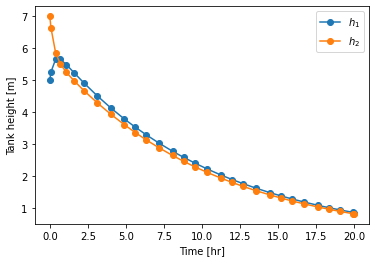

In [0]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

A1 = 5 #m^2
R1 = 0.1 # hr/m^2
tau1 = A1*R1

A2 = 5 #m^2
R2 = 1 #hr/m^2
tau2 = A2*R2

#Set up the differential equation, solve with solve_ivp, and plot the solution 

def diff_eq(t,y):
  h1,h2 = y

  return [h2/tau1-h1/tau1, #what is h1'?
          R2/R1/tau2*h1-(R1+R2)/R1/tau2*h2]  #what is h2'?

# use solve_ivp to solve for t = 0 to t=20
t_span = [0, 20]
y0 =[5, 7]
sol = solve_ivp(diff_eq, t_span, y0)

# try plotting the solutions with plt.plot
plt.plot(sol.t, sol.y.T,'-o')
plt.xlabel('Time [hr]')
plt.ylabel('Tank height [m]')
plt.legend(['$h_1$', '$h_2$'])